<a href="https://colab.research.google.com/github/Devicharith/Python/blob/master/PCA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("/content/faces.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.632231,0.652893,0.582645,0.636364,0.636364,0.706612,0.747934,0.780992,0.793388,0.814050,0.822314,0.814050,0.809917,0.801653,0.818182,0.801653,0.826446,0.834711,0.834711,0.842975,0.834711,0.826446,0.838843,0.826446,0.826446,0.842975,0.834711,0.818182,0.818182,0.814050,0.830578,0.822314,0.818182,0.822314,0.822314,0.830578,0.818182,0.801653,0.805785,0.814050,...,0.673554,0.611570,0.599174,0.545455,0.528926,0.557851,0.545455,0.636364,0.595041,0.595041,0.603306,0.615702,0.566116,0.557851,0.578512,0.578512,0.549587,0.491736,0.458678,0.462810,0.421488,0.380165,0.347107,0.206612,0.285124,0.239669,0.247934,0.272727,0.247934,0.256198,0.285124,0.272727,0.210744,0.231405,0.223141,0.107438,0.082645,0.090909,0.090909,13
1,0.665289,0.776860,0.789256,0.801653,0.818182,0.801653,0.793388,0.797521,0.789256,0.801653,0.793388,0.809917,0.818182,0.826446,0.830578,0.826446,0.826446,0.826446,0.826446,0.826446,0.830578,0.818182,0.826446,0.818182,0.805785,0.801653,0.785124,0.768595,0.772727,0.776860,0.776860,0.789256,0.797521,0.793388,0.780992,0.797521,0.797521,0.785124,0.776860,0.797521,...,0.611570,0.611570,0.549587,0.566116,0.574380,0.561983,0.549587,0.557851,0.553719,0.553719,0.582645,0.553719,0.524793,0.561983,0.566116,0.537190,0.508265,0.471074,0.400826,0.276859,0.355372,0.475207,0.454545,0.417355,0.442149,0.206612,0.049587,0.049587,0.070248,0.066116,0.078512,0.095041,0.086777,0.103306,0.123967,0.152893,0.148760,0.157025,0.190083,26
2,0.541322,0.553719,0.582645,0.619835,0.632231,0.669422,0.702479,0.727273,0.735537,0.747934,0.764463,0.772727,0.785124,0.789256,0.793388,0.793388,0.809917,0.809917,0.830578,0.826446,0.826446,0.834711,0.834711,0.830578,0.830578,0.830578,0.826446,0.826446,0.818182,0.809917,0.814050,0.805785,0.809917,0.805785,0.814050,0.814050,0.814050,0.818182,0.809917,0.814050,...,0.739669,0.739669,0.735537,0.735537,0.714876,0.727273,0.739669,0.710744,0.665289,0.657025,0.661157,0.669422,0.665289,0.652893,0.661157,0.673554,0.661157,0.619835,0.648760,0.623967,0.566116,0.454545,0.417355,0.297521,0.169422,0.132231,0.165289,0.223141,0.227273,0.227273,0.243802,0.223141,0.243802,0.227273,0.223141,0.210744,0.223141,0.231405,0.227273,2
3,0.185950,0.342975,0.512397,0.570248,0.628099,0.615702,0.652893,0.661157,0.685950,0.727273,0.743802,0.764463,0.768595,0.776860,0.789256,0.785124,0.793388,0.793388,0.789256,0.814050,0.818182,0.818182,0.818182,0.822314,0.826446,0.826446,0.822314,0.826446,0.826446,0.834711,0.826446,0.818182,0.826446,0.830578,0.826446,0.826446,0.826446,0.822314,0.818182,0.822314,...,0.661157,0.702479,0.714876,0.735537,0.743802,0.756198,0.735537,0.719008,0.723140,0.727273,0.727273,0.735537,0.735537,0.698347,0.677686,0.677686,0.665289,0.628099,0.590909,0.561983,0.557851,0.549587,0.545455,0.512397,0.516529,0.475207,0.454545,0.446281,0.446281,0.404959,0.351240,0.326446,0.355372,0.429752,0.487603,0.371901,0.301653,0.322314,0.318182,3
4,0.636364,0.652893,0.669422,0.677686,0.685950,0.702479,0.698347,0.702479,0.714876,0.710744,0.723140,0.735537,0.747934,0.747934,0.743802,0.731405,0.727273,0.731405,0.735537,0.731405,0.739669,0.743802,0.747934,0.727273,0.739669,0.727273,0.706612,0.702479,0.731405,0.719008,0.727273,0.714876,0.727273,0.731405,0.727273,0.723140,0.723140,0.735537,0.710744,0.702479,...,0.500000,0.500000,0.479339,0.475207,0.487603,0.495868,0.483471,0.475207,0.483471,0.495868,0.500000,0.512397,0.504132,0.516529,0.508265,0.528926,0.545455,0.557851,0.553719,0.541322,0.545455,0.553719,0.549587,0.520661,0.516529,0.528926,0.528926,0.537190,0.545455,0.520661,0.504132,0.487603,0.479339,0.347107,0.223141,0.239669,0.268595,0.243802,0.177686,1


### Original Faces

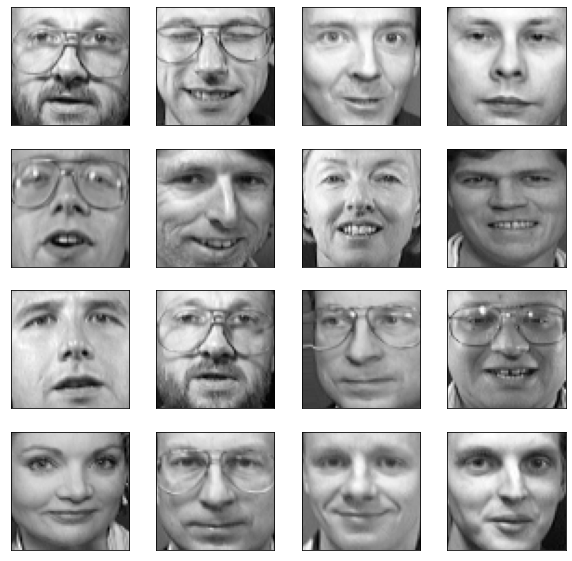

In [20]:
images = data.drop(["target"], axis=1)

fig, axes = plt.subplots(4, 4, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(images)[i].reshape(64, 64), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [6]:
pca = PCA(n_components=100)

inp = data.drop(["target"], axis=1)
out = data["target"]

inp_train, inp_test, out_train, out_test = tts(inp, out,test_size=0.2,random_state=82)

pca.fit(inp_train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

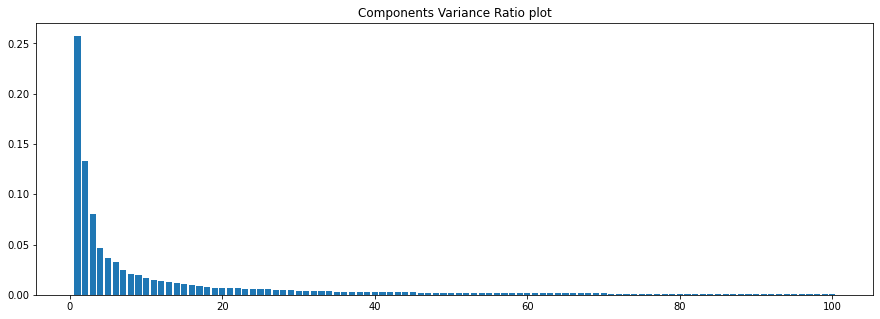

In [22]:
plt.figure(figsize=(15,5))
plt.bar(np.linspace(1,100,100),pca.explained_variance_ratio_)
plt.title("Components Variance Ratio plot")
plt.show()

### Eigen Faces (Basis)

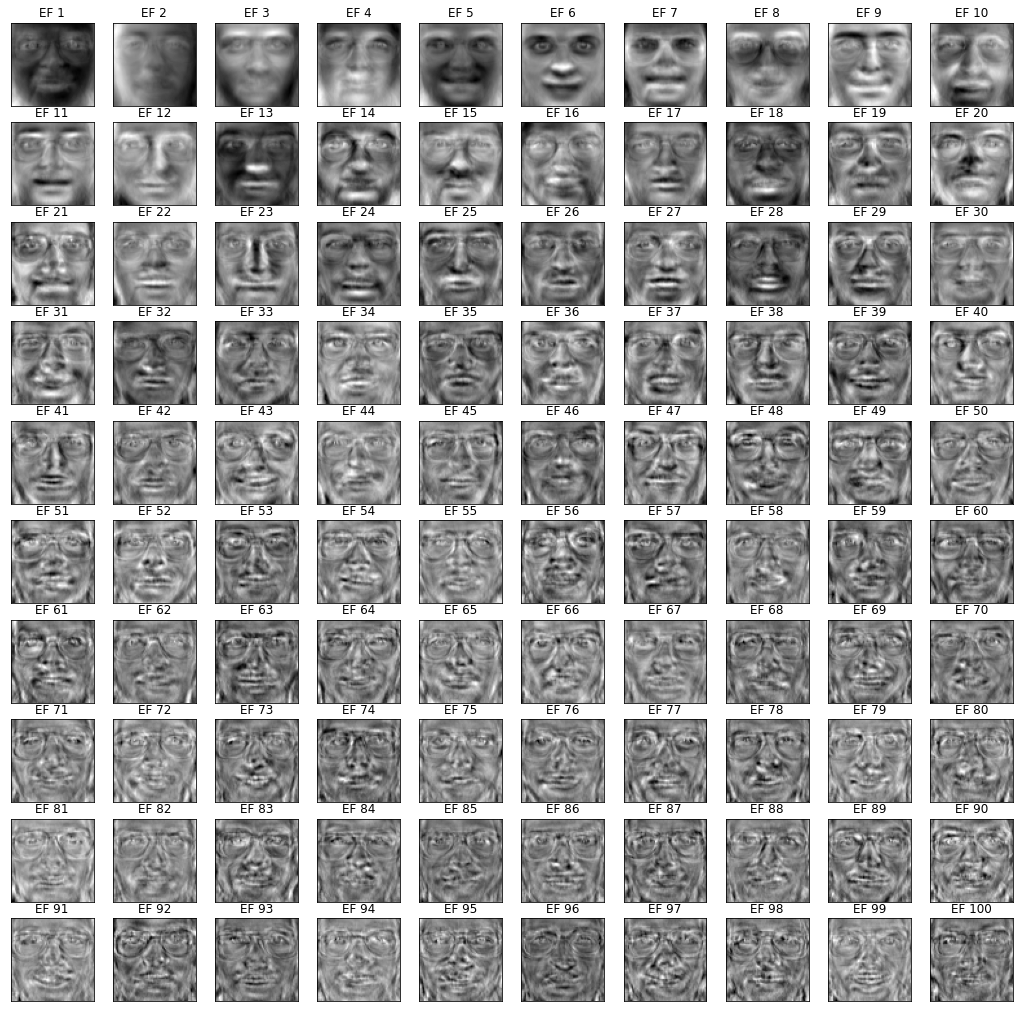

In [12]:
fig, axes = plt.subplots(10, 10, figsize=(18, 18))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(pca.components_[i]).reshape(64, 64), cmap="gray")
    ax.set_title('EF '+str(i+1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Representing reduced faces

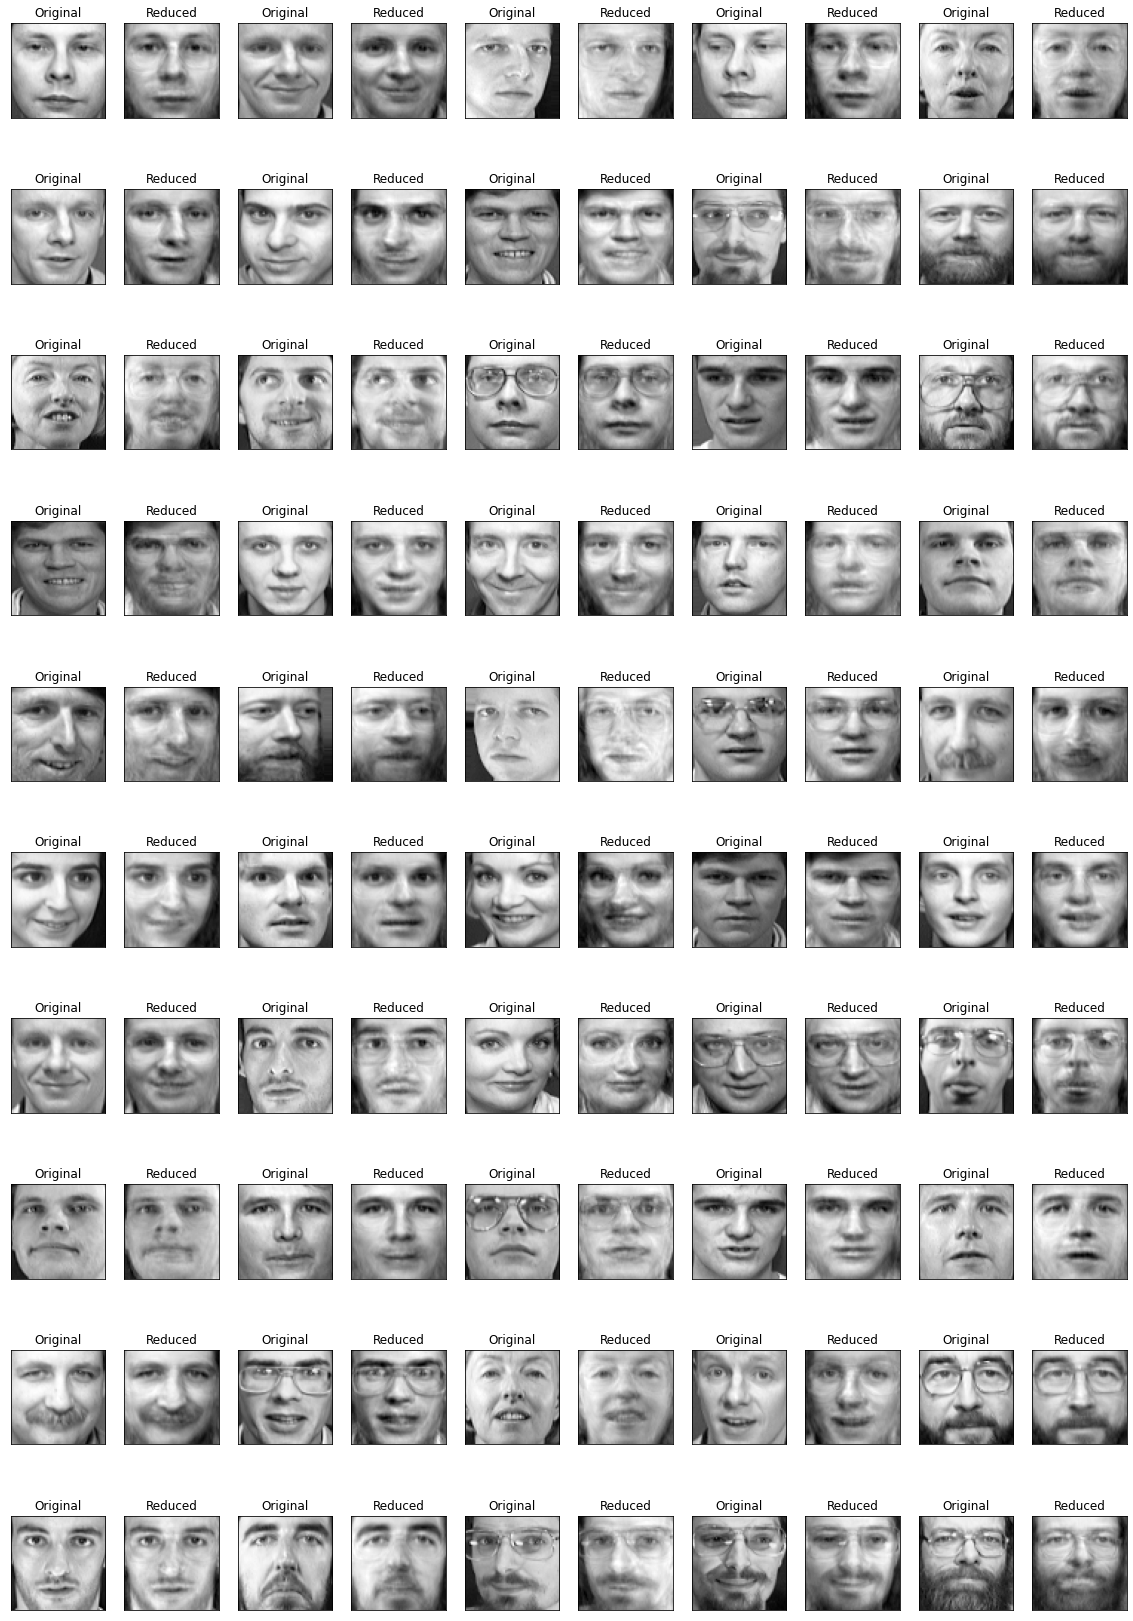

In [16]:
inp_test_compressed = pca.transform(inp_test)
inp_test_reduced = pca.inverse_transform(inp_test_compressed)

fig, axes = plt.subplots(10, 10, figsize=(20,30),subplot_kw={'xticks':[], 'yticks':[]})
count=0

for i in range(0,10):
    for j in range(0,10,2):
        axes[i,j].imshow(np.array(inp_test)[count].reshape(64, 64), cmap="gray")
        axes[i,j].title.set_text('Original')
        axes[i,j+1].imshow(inp_test_reduced[count].reshape(64, 64), cmap="gray")
        axes[i,j+1].title.set_text('Reduced')
        count += 1
plt.show()

###  Face Recognition using Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

lreg = LogisticRegression()

inp_train_compressed = pca.transform(inp_train)

lreg.fit(inp_train_compressed, out_train)

inp_test_compressed = pca.transform(inp_test)
pred = lreg.predict(inp_test_compressed)

print(accuracy_score(out_test, pred)*100)

96.25
